# Capstone Project

## Background

We are glad you have successfully reached the capstone project part of "Data Science Fundamentals" course. You will put everything 
you have learned so far about data science to work. The outcome of this module should potentially serve as your portfolio item.

Unlike with previous projects, this time you are free to choose a dataset to explore from three suggested ones. As you will have to solve a provided problem, there will not be list of predefined questions that you have to answer - be creative and explore any dimensions of data you deem worth analyzing.

Although this might seem scary, this is how data science looks like in the industry. Often, it's your responsibility to not only give answers using the data, but also raise questions. The more creatively you look at this project, the better. Good luck!

----

## Requirements

Whichever problem you choose to analyze, general requirements are as follow:

#### Exploratory Data Analysis
* Describe the data with basic statistical parameters - mean, median, quantiles, etc. Use parameters that give you the most important statistical insights of the data.
* Grouping the data and analyzing the groups - using Pandas aggregate methods.
* Work with features - handle missing data if needed, use pandas date APIs.
* Manipulate datasets - use joins in needed.
* Visualize the data - you can use line, scatter, histogram plots, density plots, regplots, etc.

#### Statistical hypothesis testing
* Use at least one statistical significance test.
* Report p-values.
* Use visualizations.

#### Modeling
* Visualize data with dimensionality reduction algorithms.
* Perform cluster analysis.
* Use a linear model to explain relationships and predict new values.

#### Presentation
* Present the project - the data, methods and results.

## Problems

#### Fatal Police Shooting in United States

<div><img width="400px" height="auto" src="https://images.unsplash.com/photo-1606352466047-7cef02b312bb?ixlib=rb-1.2.1&ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&auto=format&fit=crop&w=1662&q=80" /></div>

[Police brutality in the United States](https://en.wikipedia.org/wiki/Police_brutality_in_the_United_States) has been an nationwide issue since the 20th century. Public safety of U.S. citizens is a typical argument to justify the controversially high number of fatal shootings.

You are a contractor to the United States Department of Justice. **You have been given a case to investigate fatal police shootings throughout the United States of America, provide a list of issues, and propose a plan on how to tackle these issues**.

The department offered some tips - the public opinion indicates that there's something systematically fishy of police actions against civilians, some states differ from other, some cities are different from others, race equality is still an unanswered question, there's some talk about huge spendings on police, rumors about mental issues of those getting shot. Government is all about prioritizing - use the data to list issues with the police activity and propose a plan which issues to tackle first and how.

Your are given 1 dataset to start with. Try to search for more datasets to enrich your data analysis.

Here's the dataset:

* [Fatal Police Shootings in the U.S. '15 - '17](https://www.kaggle.com/washingtonpost/police-shootings).

## Evaluation Criteria

- Code quality
- Fulfillment of the idea
- Adherence to the requirements
- Delivery of the presentation

#### Statistical hypothesis testing
- Correct statistical test method is used, based on the situation.
- Reasoning on chosen statistical significance level.

#### Modeling
- Both PCA and T-SNE algorithms are used.



---

# Project

In [ ]:
!pip install prince
!pip install kmodes
!pip install kneed

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import prince
import scipy.stats as st

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from kmodes.kprototypes import KPrototypes
from kneed import KneeLocator

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
url = 'https://drive.google.com/file/d/175MfNVZE_US2LuoZSuyiozTLtDMQiG3J/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

police_brutality = pd.read_csv(path) 

police_brutality.head(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


## Exploratory Data Analysis:

### Age and weapon overview:

In [ ]:
max_age = police_brutality.age.max()
min_age = police_brutality.age.min()
armed = police_brutality['armed'].value_counts()[:5]
print(f"Age of the youngest victim: {min_age}\nAge of the oldest victim: {max_age}\n")
print(f"List of 5 most often used weapons:\n{armed}")

Age of the youngest victim: 6.0
Age of the oldest victim: 86.0

List of 5 most often used weapons:
gun             1173
knife            319
unarmed          155
vehicle          136
undetermined     101
Name: armed, dtype: int64


Here we can see ages of youngest and olders victims and a list of most often used weapons.

In [ ]:
youngest_oldest = police_brutality.loc[(police_brutality['age'] == max_age) | (police_brutality['age'] == min_age)]
youngest_oldest

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
426,542,Raymond Phillips,2015-06-11,shot,gun,86.0,M,NaN,Columbia,TN,True,attack,Not fleeing,False
830,980,Jeremy Mardis,2015-11-03,shot,unarmed,6.0,M,W,Marksville,LA,False,other,Car,True
1675,1880,Eugene Craig,2016-09-12,shot,gun,86.0,M,NaN,Saratoga,CA,False,other,Not fleeing,False


From the table above we can see that some things do not make sense. How could a 6 year old try to flee with a car? And how he got shot by a police officer? After searching for answers to those questions I found out that Jeremy Mardis died as a result of an incident. After his father refused to stop for the police, they shot his car 15 times, few of those shots hitting Mardis in the head and torso.

### Deaths by race analysis:

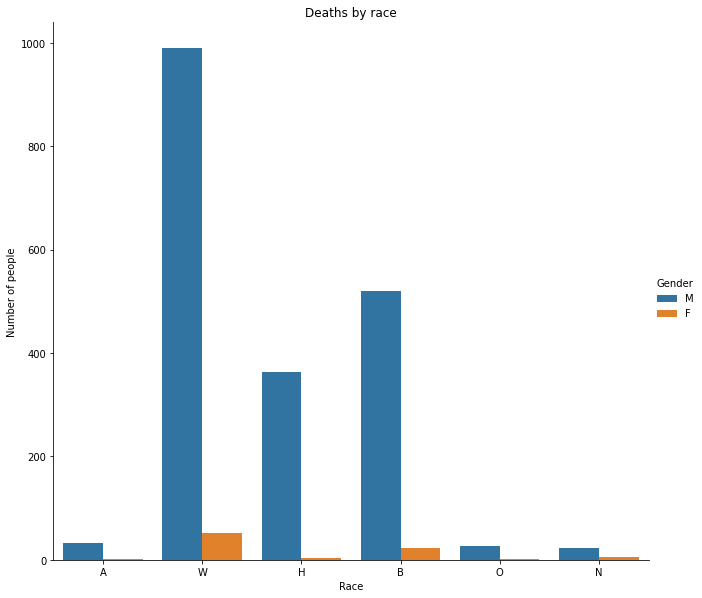

In [ ]:
ax = sns.catplot(data=police_brutality, kind="count", x="race", hue="gender", legend_out = True, height=8, aspect=9/8)
ax.set(xlabel='Race', ylabel='Number of people', title='Deaths by race')
ax._legend.set_title('Gender')

From this graph we can see that the numbers normal to the untrained eye. But we should remember that population of different races it not the same.

In [ ]:
white_pop_2016 = 192537500
black_pop_2016 = 38081700
hispa_pop_2016 = 56144400

In [ ]:
brutality_race = police_brutality.groupby('race').count()['id'] # Taking id because of missing information in some columns
white_percentage = round(brutality_race['W'] / white_pop_2016 * 100, 5)
black_percentage = round(brutality_race['B'] / black_pop_2016 * 100, 5)
hispa_percentage = round(brutality_race['H'] / hispa_pop_2016 * 100, 5)

print(f"Percentages of people killed (by race):\nWhite: {white_percentage}%\nBlack: {black_percentage}%\nHispanic: {hispa_percentage}%")

Percentages of people killed (by race):
White: 0.00054%
Black: 0.00142%
Hispanic: 0.00065%


We can see that although there are more deaths in total of white people, black people deaths are more common when looked into the the total population of white and black community members.

### Different gender manner of death

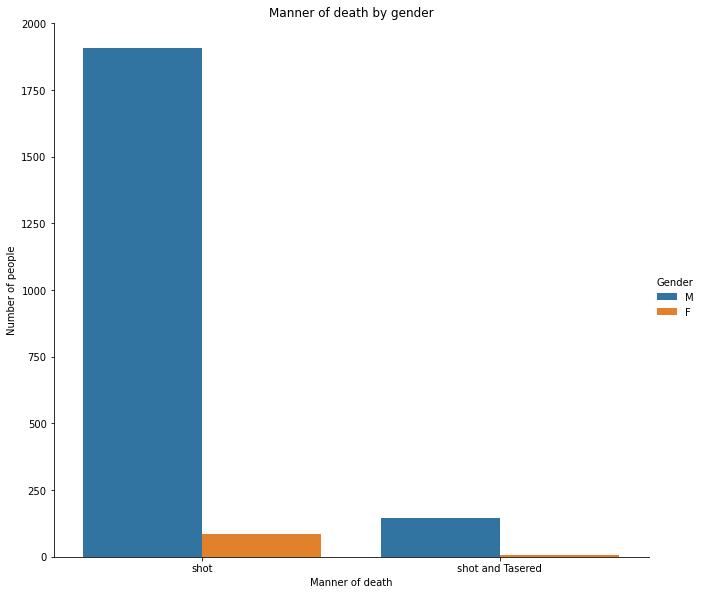

In [ ]:
ax = sns.catplot(data=police_brutality, x='manner_of_death', kind="count", hue="gender", legend_out = True, height=8, aspect=9/8)
ax.set(xlabel='Manner of death', ylabel='Number of people', title='Manner of death by gender')
ax._legend.set_title('Gender')

Majority of victims were shot but not tasered.

### Deaths in each state:

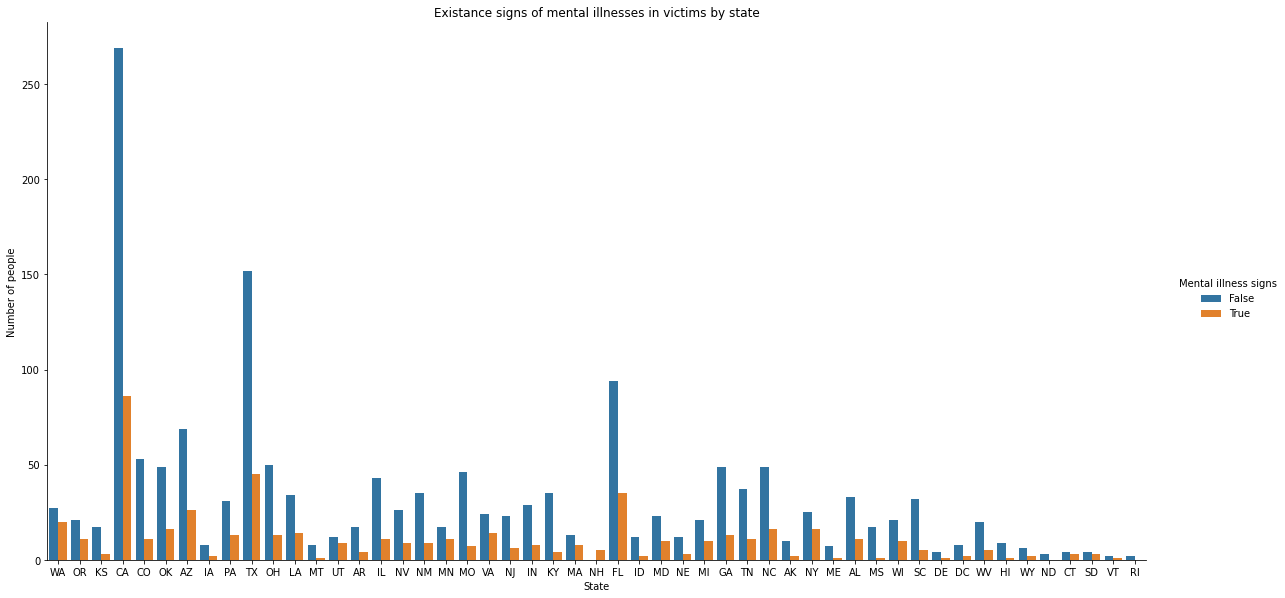

In [ ]:
ax = sns.catplot(data=police_brutality, x='state', kind="count", hue="signs_of_mental_illness", legend_out = True, height=8, aspect=16/8)
ax.set(xlabel='State', ylabel='Number of people', title='Existance signs of mental illnesses in victims by state')
ax._legend.set_title('Mental illness signs')

Biggest and more populated states have more cases of a policeman shooting a person because of the number of residents in a given state.

### Gender threat number:

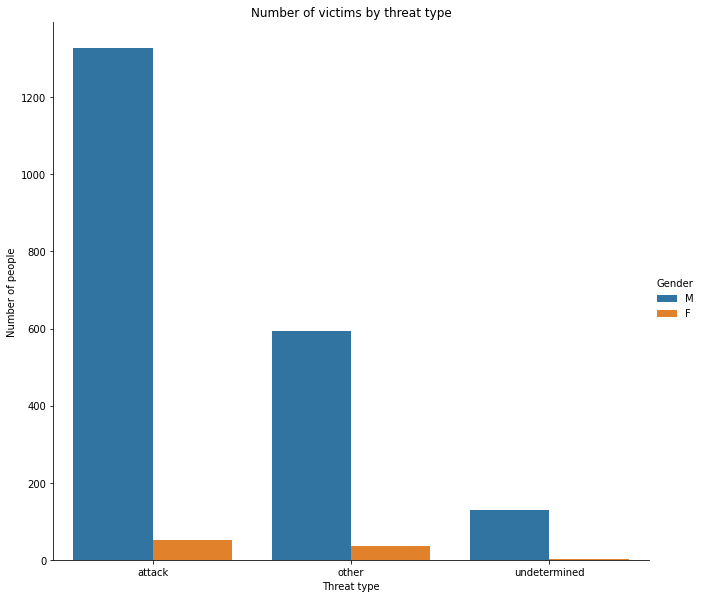

In [ ]:
ax = sns.catplot(data=police_brutality, x='threat_level', kind="count", hue="gender", legend_out = True, height=8, aspect=9/8)
ax.set(xlabel='Threat type', ylabel='Number of people', title='Number of victims by threat type')
ax._legend.set_title('Gender')

More than half of the police killings were caused by an aggresive encounter.

### Distribution by age:

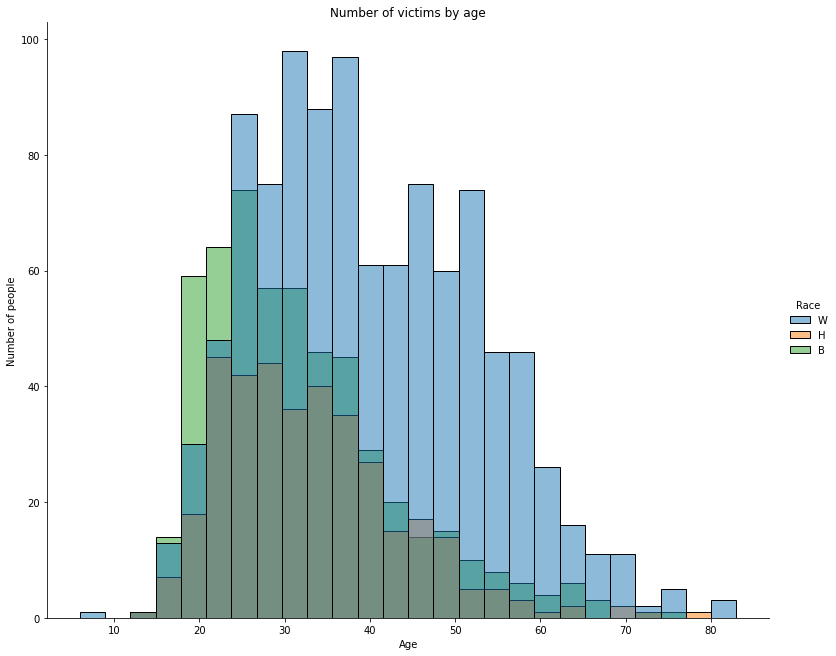

In [ ]:
white_black_hispanic_brutality = police_brutality[(police_brutality.race != 'A') & (police_brutality.race != 'O') & (police_brutality.race != 'N')]

ax = sns.displot(data=white_black_hispanic_brutality, x='age', hue="race", height=9, aspect=11/9)
ax.set(xlabel='Age', ylabel='Number of people', title='Number of victims by age')
ax._legend.set_title('Race')

There seems to be a much higher number of young black colored people deaths by police. Are black citizens in their 20s more threatening to the police?

## Statistical hypothesis testing:

### Hypotheses:
*   Null Hypothesis: There is no difference in the proportions of different race killings. **p > 0.05**
*   Alternate Hypothesis: There is a difference in the proportions of different race killings. **p < 0.05**


We are going to use a z-test to test if 2 proportions are the same or different and come to the conclusions using p-values.

Alpha level: 5%

### Formule and calculations:

<div><img width="400px" height="auto" src="https://www.statisticshowto.com/wp-content/uploads/2014/02/two-proprtion-z-test.png" /></div>

In [ ]:
white_pop_2016 = 192537500
black_pop_2016 = 38081700

race_brutality = police_brutality.groupby('race').count()['id']

white_samples = race_brutality['W']
black_samples = race_brutality['B']

proportion_white = white_samples / white_pop_2016
proportion_black = black_samples / black_pop_2016
proportion_overall = (white_samples + black_samples)/(white_pop_2016 + black_pop_2016)

In [ ]:
z_score_from_table = round(st.norm.ppf(.975), 2) # alpha level 5%

z_score = ((proportion_black-proportion_white)-0)/(np.sqrt(proportion_overall*(1-proportion_overall)*(1/white_pop_2016 + 1/black_pop_2016)))
print(f"z-score:{round(z_score, 2)}\nz-score for statistical significance at alpha 5%: {z_score_from_table}")

z-score:18.99
z-score for statistical significance at alpha 5%: 1.96


From the z-scores above we can clearly see that the difference in proportions is big and that the z-score that we got from is far higher than the required score of 1.96. Let's calculate p-values.

### Statistical significance p-values:

In [ ]:
null_p_value = 0.05
z_score_p_value = st.norm.sf(abs(z_score))*2
print(f"Null hypothesis p-value: {null_p_value}\np_value from the test: {format(z_score_p_value, '.85f')}")

Null hypothesis p-value: 0.05
p_value from the test: 0.0000000000000000000000000000000000000000000000000000000000000000000000000000000188751


p-value is clearly a smaller number than our alpha. We can confidently reject the null hypothesis and say that the population proportions are clearly not similar or equal. We can compare Black victims/population proportion with the white victims/population proportion and see that black population proportion is definitely bigger which indicates that black people are killed more often than white people.

## Modeling:

### Dimensionality reduction:

In [ ]:
police_brutality.dropna(inplace=True)
police_brutality.reset_index(inplace=True)
columns = ['manner_of_death', 'gender', 'race', 'state', 'signs_of_mental_illness', 'threat_level']

brutality_categorical_mca_dataframe = police_brutality[columns].applymap(str)

In [ ]:
mca = prince.MCA(n_components=2, n_iter=25)
mca = mca.fit_transform(brutality_categorical_mca_dataframe)

mca.rename({0: 'c1', 1: 'c2'}, axis='columns', inplace=True)
brutality_categorical_mca_dataframe = pd.concat([brutality_categorical_mca_dataframe, mca], axis=1)

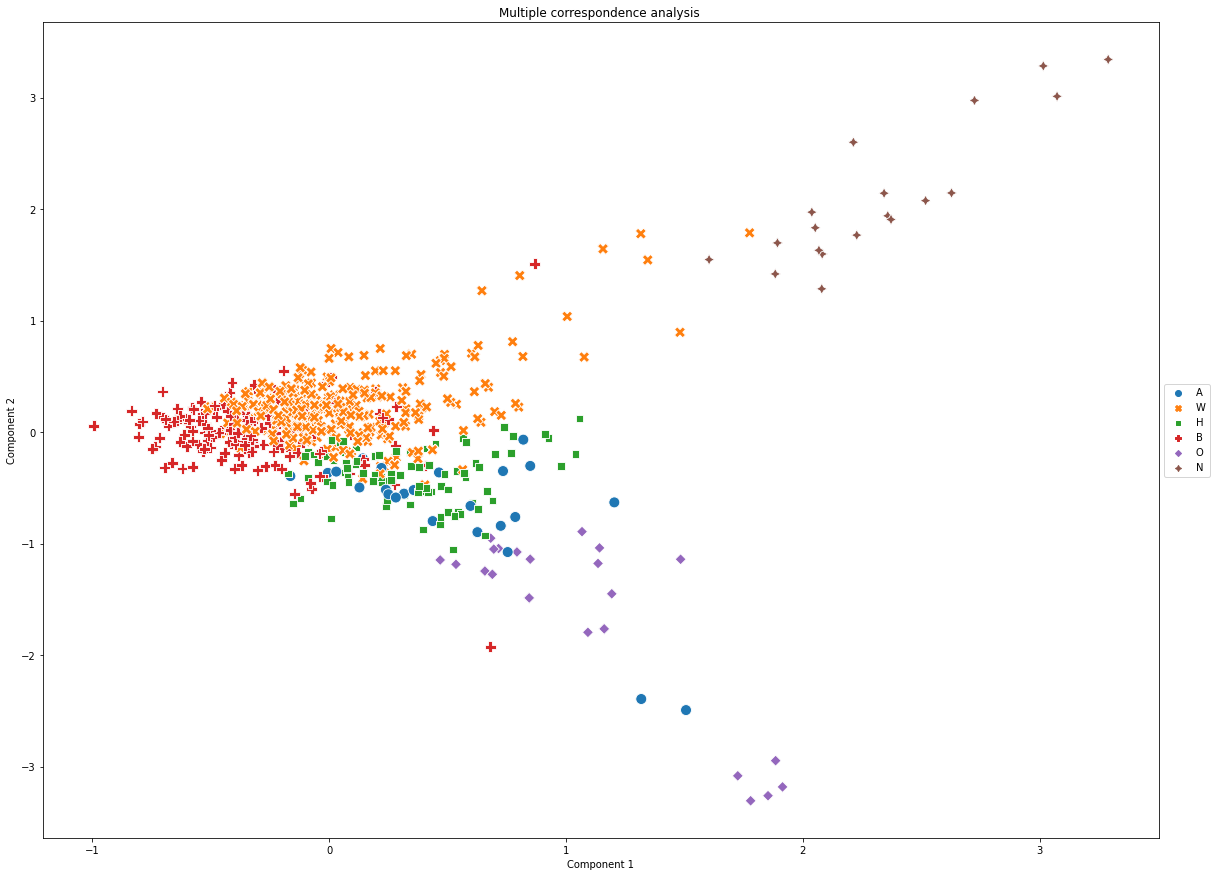

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))
pc_plot = sns.scatterplot(data=brutality_categorical_mca_dataframe, x='c1', y='c2', hue='race', style='race', s=120)
pc_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('Multiple correspondence analysis ')
ax.set_ylabel('Component 2')
ax.set_xlabel('Component 1');

In the dimensionality reduction graph above we can different races displayed by different symbols and colors.

In [ ]:
columns = ['manner_of_death', 'gender', 'race', 'signs_of_mental_illness', 'threat_level', 'body_camera']
features = police_brutality[columns]

enc_pca = OneHotEncoder(sparse=False)

encoded_features = enc_pca.fit_transform(features)

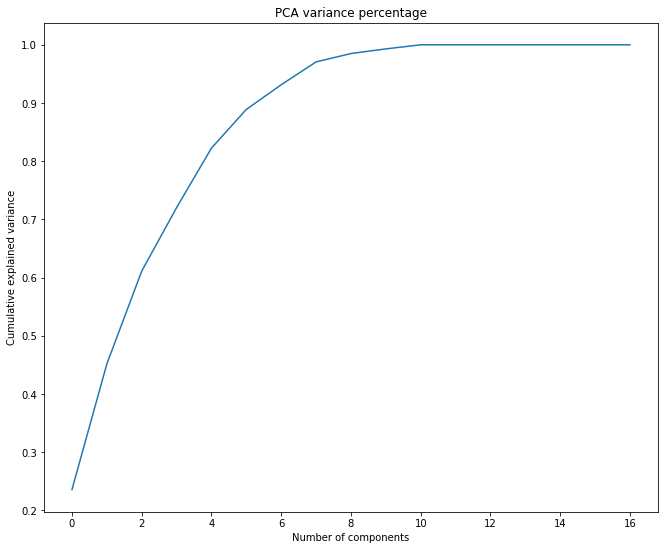

In [ ]:
pca_component_variance = PCA().fit(encoded_features)
plt.plot(np.cumsum(pca_component_variance.explained_variance_ratio_))

plt.rcParams["figure.figsize"] = (11,9)
plt.title('PCA variance percentage')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

From the graph above we can see that we would get a 60% explained variance score with 2 components.

In [ ]:
pca = PCA(n_components=2)
principal_components = pd.DataFrame(pca.fit_transform(encoded_features), columns=['pca1', 'pca2'])

In [ ]:
tsne = TSNE(n_components=2, random_state=1)
tsne_component = pd.DataFrame(tsne.fit_transform(encoded_features), columns=['tsne1', 'tsne2'])

In [ ]:
dimen_df = pd.concat([features, principal_components, tsne_component], axis=1)

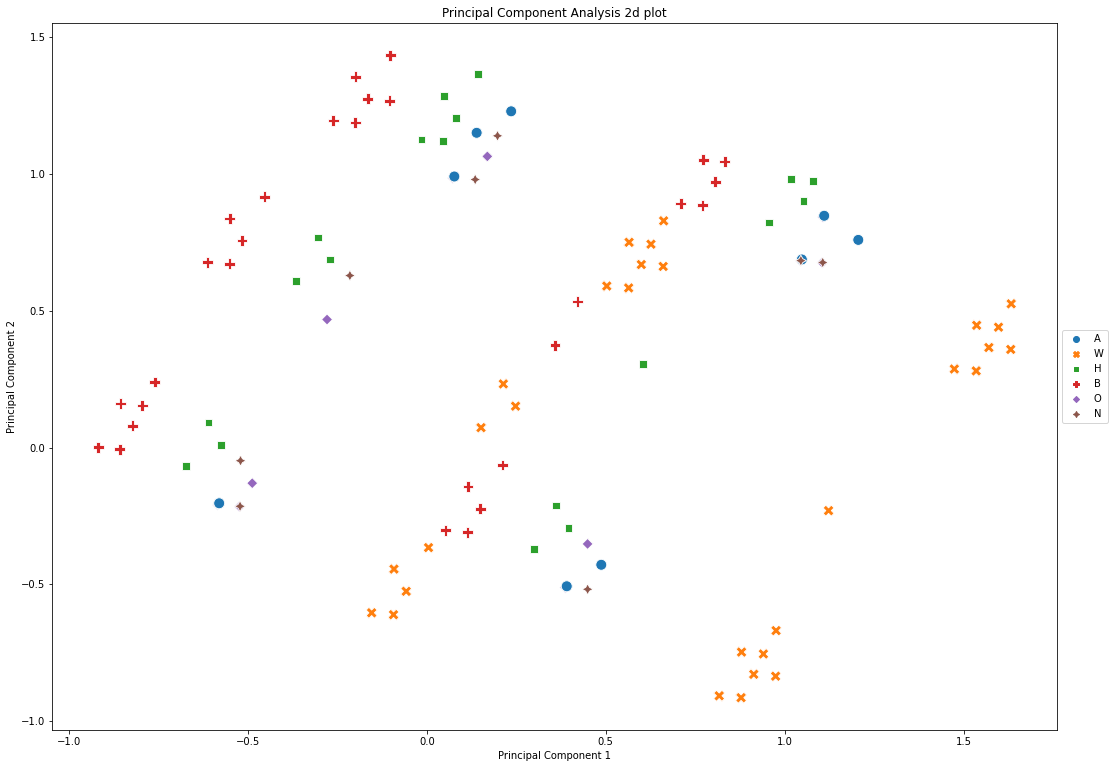

In [ ]:
fig, ax = plt.subplots(figsize=(18,13))
pc_plot = sns.scatterplot(data=dimen_df, x='pca1', y='pca2', hue='race', style='race', s=120)
pc_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('Principal Component Analysis 2d plot')
ax.set_ylabel('Principal Component 2')
ax.set_xlabel('Principal Component 1');

From the scatter plot above we can see that some groups of the same race and some groups of mixed races. But because the graph shows rougly 60% of the variance we cannot make any conclusions.

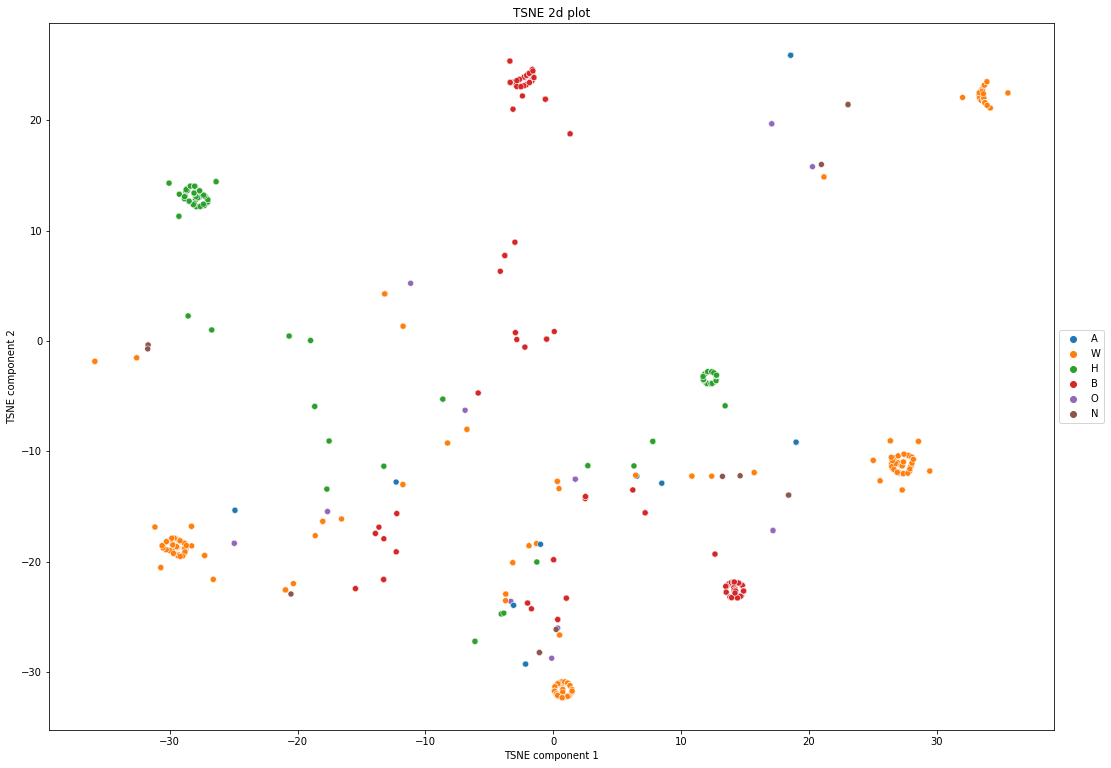

In [ ]:
fig, ax = plt.subplots(figsize=(18,13))
pc_plot = sns.scatterplot(data=dimen_df, x='tsne1', y='tsne2', hue='race')
pc_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('TSNE 2d plot')
ax.set_ylabel('TSNE component 2')
ax.set_xlabel('TSNE component 1');

From the tsne graph above we can see some neatly grouped same gender points and then some points that are spread through the whole scatterplot.

### Clustering:

In [ ]:
police_brutality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    1986 non-null   int64  
 1   id                       1986 non-null   int64  
 2   name                     1986 non-null   object 
 3   date                     1986 non-null   object 
 4   manner_of_death          1986 non-null   object 
 5   armed                    1986 non-null   object 
 6   age                      1986 non-null   float64
 7   gender                   1986 non-null   object 
 8   race                     1986 non-null   object 
 9   city                     1986 non-null   object 
 10  state                    1986 non-null   object 
 11  signs_of_mental_illness  1986 non-null   bool   
 12  threat_level             1986 non-null   object 
 13  flee                     1986 non-null   object 
 14  body_camera             

To fit the data to the kprototype clustering algorithm we need to leave only categorical and numeric variables.

In [ ]:
police_brutality.select_dtypes('object').nunique()

name               1981
date                725
manner_of_death       2
armed                61
gender                2
race                  6
city               1159
state                51
threat_level          3
flee                  4
dtype: int64

During data pre-processing we aim to remote columns which are **name**, **date**, **city** and **state**. There a couple reasons why we want to remove them: 

1. **name**, **city** and **state** columns have a lot of different values that add up to the computational load. The information is too much to process and becomes meaningless.
2. **date**: algorithm needs assumption that the rows in the data represent the unique observation
3. **id** column has meaningless information to the cluster analysis

In [ ]:
columns = ['id', 'name', 'date', 'city', 'state','signs_of_mental_illness', 'body_camera', 'index']

clustering_brutality = police_brutality.drop(columns=columns)
cat_columns_pos = [clustering_brutality.columns.get_loc(col) for col in list(clustering_brutality.select_dtypes('object').columns)]

clustering_brutality_matrix = clustering_brutality.to_numpy()

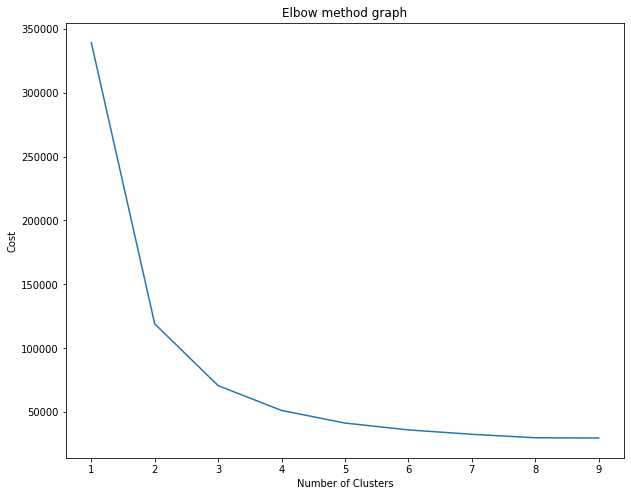

In [ ]:
cost = [] # Sum distance of all points to their respective cluster centroids
for cluster in range(1, 10):
  kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0) # n_jobs uses all cpu's
  kprototype.fit_predict(clustering_brutality_matrix, categorical = cat_columns_pos)
  cost.append(kprototype.cost_)

fig, axs = plt.subplots(figsize=(10,8))
plt.plot(range(1, 10), cost)
plt.xticks(range(1, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("Cost")
plt.title('Elbow method graph')

fig.set(facecolor='white')
plt.show()

From the elbow graph above we can see that the best number of clusters would be from 3 to 5.

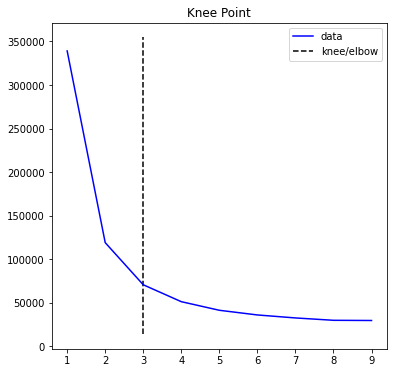

In [ ]:
kl = KneeLocator(range(1, 10), cost, curve="convex", direction="decreasing")
kl.plot_knee()

Knee locator shows that we should pick 3 clusters, but after further research I have decided to choose 5 clusters to group data into groups that have more distinct features.

In [ ]:
kprototype = KPrototypes(n_jobs = -1, n_clusters = 5, init = 'Huang', random_state = 40)
kprototype.fit_predict(clustering_brutality_matrix, categorical = cat_columns_pos)

array([4, 4, 0, ..., 3, 0, 0], dtype=uint16)

In [ ]:
clustering_brutality['Cluster_number'] =  kprototype.labels_
clustering_brutality['Cluster'] = clustering_brutality['Cluster_number'].map({0:'First', 1:'Second', 2:'Third', 3: 'Forth', 4: 'Fifth'})

In [ ]:
clustering_brutality.rename(columns= {'Cluster_number': 'Total'}, inplace=True)
clustering_brutality.groupby('Cluster').agg({
    'Total': 'count',
    'manner_of_death': lambda x: x.value_counts().index[0],
    'armed': lambda x: x.value_counts().index[0],
    'age': 'mean',
    'gender': lambda x: x.value_counts().index[0],
    'race': lambda x: x.value_counts().index[0],
    'threat_level': lambda x: x.value_counts().index[0],
    'flee': lambda x: x.value_counts().index[0]
}).reset_index()

,Cluster,Total,manner_of_death,armed,age,gender,race,threat_level,flee
0,Fifth,356,shot,gun,49.014045,M,W,attack,Not fleeing
1,First,467,shot,gun,21.670236,M,B,attack,Not fleeing
2,Forth,432,shot,gun,38.407407,M,W,attack,Not fleeing
3,Second,558,shot,gun,30.089606,M,W,attack,Not fleeing
4,Third,173,shot,gun,62.225434,M,W,attack,Not fleeing


From the results above, we can see that clusters are not that different from eachother but there are a few key points. The first of them is that in each cluster the age value is different. Second, there is only one cluster that has a different race value. Third, total number of elements in each cluster is more of less similar but the **third** cluster count is smaller.

We can see that the forth cluster has the smallest amount of total elements. That's because the cluster includes older people as we can see from the average age variable.

### Linear modeling:

In [ ]:
columns = ['manner_of_death', 'armed', 'gender', 'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera']
features = police_brutality[columns]

enc = OneHotEncoder()

x = enc.fit_transform(features)
y = police_brutality.race

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

I am splitting the data to the train and test subsets. 75% of the data is in the training subsets and what's left (25%) is in the test subset.

In [ ]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train);

y_pred = logreg.predict(X_test)

Fitting the logistic regresison, and using max_iter to make the iteration count bigger so the solver (algorithm to use in optimization) takes more iterations to converge.

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, roc_auc_score

accuracy = metrics.accuracy_score(y_test, y_pred)
f_score = f1_score(y_test, y_pred, average='weighted')
roc_auc_score = roc_auc_score(y_test, logreg.predict_proba(X_test), multi_class='ovo')

print('Accuracy:', accuracy)
print('F-score:',  f_score)
print('Auc Score:', roc_auc_score)

Accuracy: 0.6217303822937625
F-score: 0.6039695653901853
Auc Score: 0.762124432686655


From the data above we can see that our mode has 60% accuracy which means that the model correctly predicts 60% of the values. The f1 score is a weighted average of the models precision and recall, the bet value is at 1 and the worst at 0.

AUC score is an overall summary of accuracy. AUC equals 0.5 when the ROC curve corresponds to random chance and 1.0 for perfect accuracy. We got an auc score of 0.76 so the model is definitely doing better than chance.

## Conclusion:

From the statistical test we can see the racial problem is real. Racism and police brutality against black people and all other people must not be tolerated. Big changes have to be done to protect all people and create a country with equality in mind. The main problem is the american policemen mindsets and the rights to have guns. Guns provoke violence. There are more different reasons why this is such a big problem, but those ones are the most important in my opinion.